# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

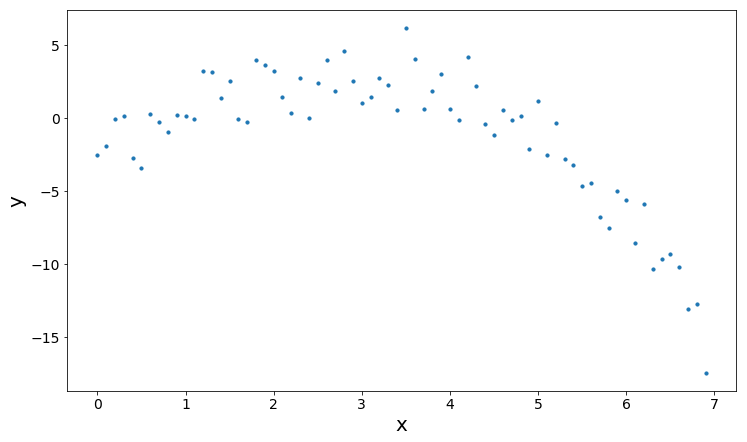

In [33]:
import matplotlib.pyplot as plt
# Your code for scatterplot here

x = xy_data[:,0] 
y = xy_data[:,1] 

plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [27]:
def polyreg(data_matrix, k):
    # Your code here
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
    
    x = data_matrix[:,0]
    y = data_matrix[:,1]
    all_ones = np.ones(np.shape(x))
    
    if k == 0:
        beta = np.mean(y)
        fit = beta*all_ones
        resid = y - fit
    else:
        N=6
        if k>=N:
            k=N

        XT = all_ones
        for i in range(k):
            XT = np.vstack((XT, x**(i+1))) # add rows up to k powers

        X = np.transpose(XT)
        beta = np.linalg.lstsq(X, y, rcond=None)[0]
        fit = X.dot(beta)
        resid = y - fit
    
    return beta,fit,resid
    

Use the tests below to check the outputs of the function you have written:

In [28]:
# Some tests to make sure your  function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape
beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

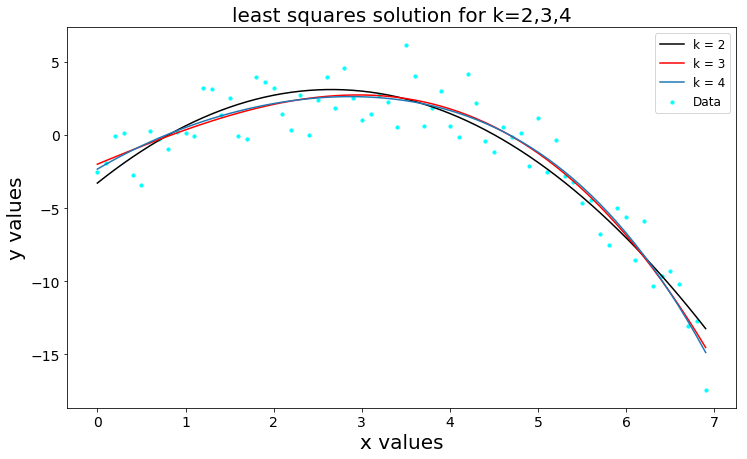

SSE_2 =  172.18  	 R^2 =  0.8876
SSE_3 =  152.41  	 R^2 =  0.9005
SSE_4 =  151.23  	 R^2 =  0.9013


In [37]:
#Your code here

[beta2,fit2,resid2] = polyreg(xy_data, 2)
[beta3,fit3,resid3] = polyreg(xy_data, 3)
[beta4,fit4,resid4] = polyreg(xy_data, 4)

plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(x, y, s=10, color = 'cyan', label = 'Data')   
plt.plot(x, fit2, color = 'black', label = 'k = 2')
plt.plot(x, fit3, color = 'red', label = 'k = 3')
plt.plot(x, fit4, label = 'k = 4')  
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('least squares solution for k=2,3,4')
plt.legend(fontsize = 'large')
plt.show()

SSE_0 = np.linalg.norm(y - np.mean(y)*np.ones(np.shape(x)) )**2
SSE2 = np.linalg.norm(y - fit2)**2
SSE3 = np.linalg.norm(y - fit3)**2
SSE4 = np.linalg.norm(y - fit4)**2
print('SSE_2 = ', np.round_(SSE2, 2), ' \t R^2 = ', np.round_(1- SSE2/SSE_0, 4))  
print('SSE_3 = ', np.round_(SSE3, 2), ' \t R^2 = ', np.round_(1- SSE3/SSE_0, 4))
print('SSE_4 = ', np.round_(SSE4, 2), ' \t R^2 = ', np.round_(1- SSE4/SSE_0, 4))

 #### State which model you choose and briefly justify your choice.
 
 
k = 4 is best, has smallest SSE and hence R^2 value as well.
 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

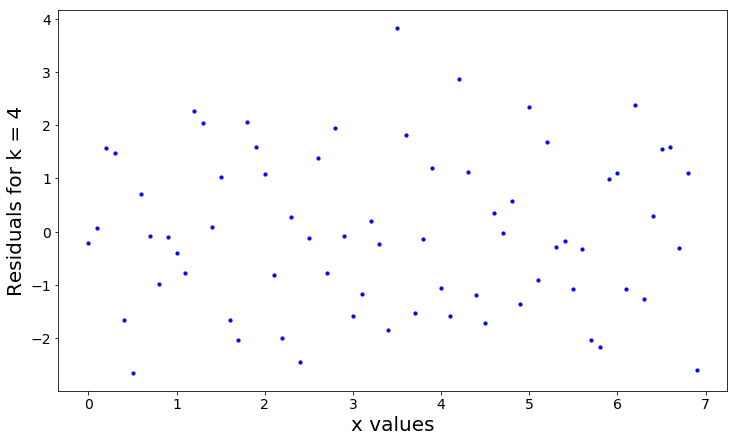

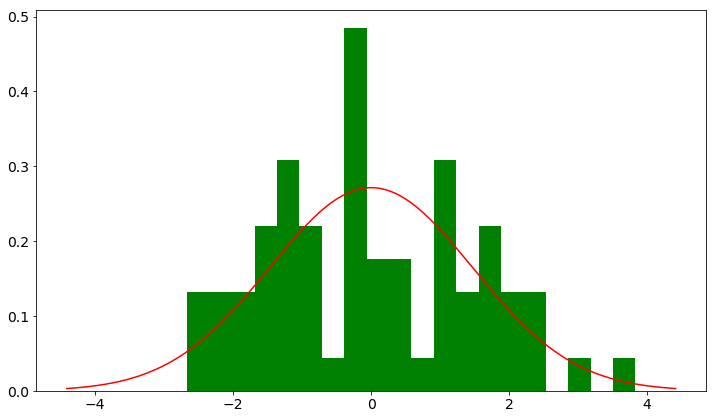

In [40]:
#Your code here

plt.scatter(x, resid4, s=10, color ='blue') 
plt.xlabel('x values')
plt.ylabel('Residuals for k = 4')
plt.show()

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(resid4, bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
from scipy.stats import norm

res_stdev = np.std(resid4)  #standard deviation of residuals
xvals = np.linspace(-3*res_stdev,3*res_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
plt.show()